In [1]:
# import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
## Normally distributed noise
# simulation details
srate = 100 # sampling rate
time = np.arange(-1, 2, 1/srate) # time vector
pnts = len(time) # number of time points

# frequencies for the power spectrum
hz = np.linspace(0, srate/2, int(np.floor(pnts/2)+1))

# noise parameters
stretch = 3 # stretch factor
shift = 0 # shift factor

# optional : fix the random number generator state
# np.random.seed(123)

# generate random data
noise = stretch * np.random.randn(1, pnts) + shift


[[0.05807445 0.02167032 0.09571937 0.2821268  0.24149699]]
[[0.05807445 0.04334063 0.19143875 0.5642536  0.48299398]]


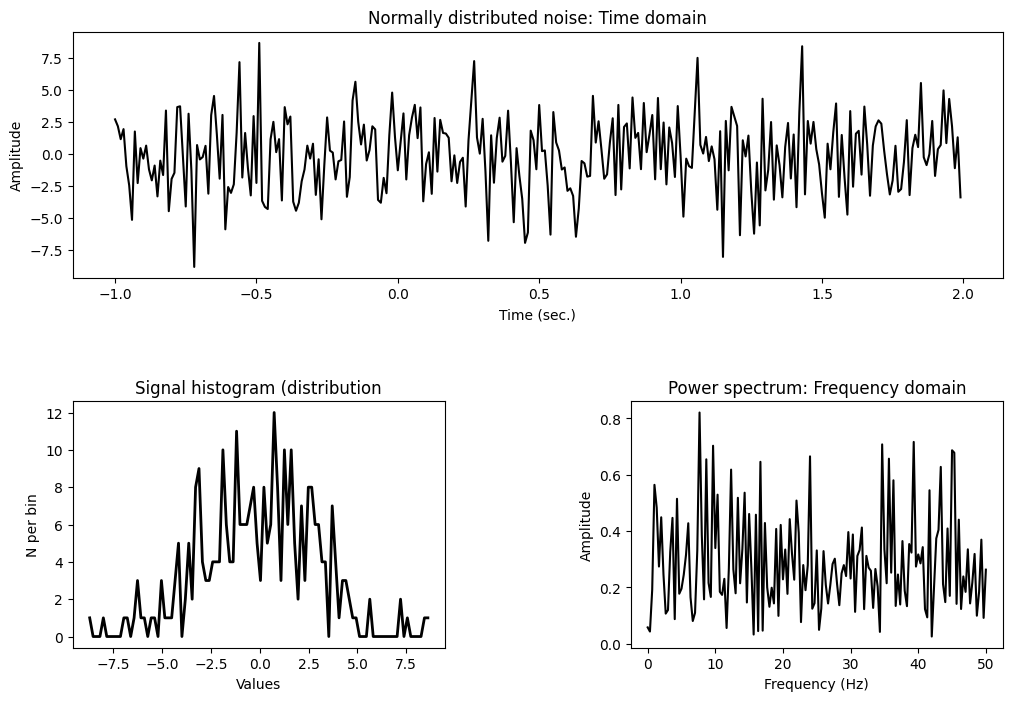

In [39]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(time, noise[0,:], 'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Normally distributed noise: Time domain')

plt.subplot(223)
y, x = np.histogram(noise, 100)
x = (x[:-1] + x[1:]) / 2
plt.plot(x, y, 'k', linewidth=2)
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.title('Signal histogram (distribution')

plt.subplot(224)
amp = np.abs(np.fft.fft(noise)/pnts)
print(amp[:1, :5])

amp[:, 1:] = 2*amp[:, 1:]
print(amp[:1, :5])
plt.plot(hz, amp[0, 0:len(hz)], 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Power spectrum: Frequency domain')
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()